**TOPIC : Forecasting and Load Management**

We are using energy dataset for forecasting energy consumption on household appliances.

60009210029:- Purvi Parmar

60009210030:- Miloni Shah

Here We have choose linear regression for modeling because Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.Linear regression is commonly used for predictive analysis and modeling.

Firstly we are going to process and clean our data,these two steps are very important for to be able to ready our data for machine learning algorithm.

In [ ]:
import pandas as pd


Reading Data

In [ ]:
df= pd.read_csv('/content/energydata_complete.csv', parse_dates=['date'])

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Here we have set date as index because later on in our processing and when we apply algorithm we are going to do forecasting of the use of energy and in which case dates are very important, so we mentioned we are going to indentify the kind of interval that could reason the impact of the noise and converted all columns name to lower case

In [ ]:
df.columns=[x.lower() for x in df.columns]

In [ ]:
df=df.set_index('date')

In [ ]:
df.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


To know how many columns and rows are there in the dataset. We use The Python numpy module has a shape function, which helps us to find the shape or size of an array or matrix.There are 19735 rows and 29 columns in the dataset.

In [ ]:
df.shape

(19735, 28)

Having an overview structure of the data.In this step we are identifying whether data has null value or not . isnull() is used to know the total number of null values in the dataset.

In [ ]:
df.isnull().sum()

appliances     0
lights         0
t1             0
rh_1           0
t2             0
rh_2           0
t3             0
rh_3           0
t4             0
rh_4           0
t5             0
rh_5           0
t6             0
rh_6           0
t7             0
rh_7           0
t8             0
rh_8           0
t9             0
rh_9           0
t_out          0
press_mm_hg    0
rh_out         0
windspeed      0
visibility     0
tdewpoint      0
rv1            0
rv2            0
dtype: int64

There is no null value in our dataset

To know the spread of our data ,descriptive percentage . The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.

In [ ]:
df.describe()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


Here we have plotted the numerical distribution of each of our variable and here we could see that each variable  has its own distribution so for appliacnces it is skewed to the left.
What is the significance of having skewedness?
The significance of having similarities of the skewedness or skewness of the different variable is that we can just select among them which one that can properly be used for our modeling.

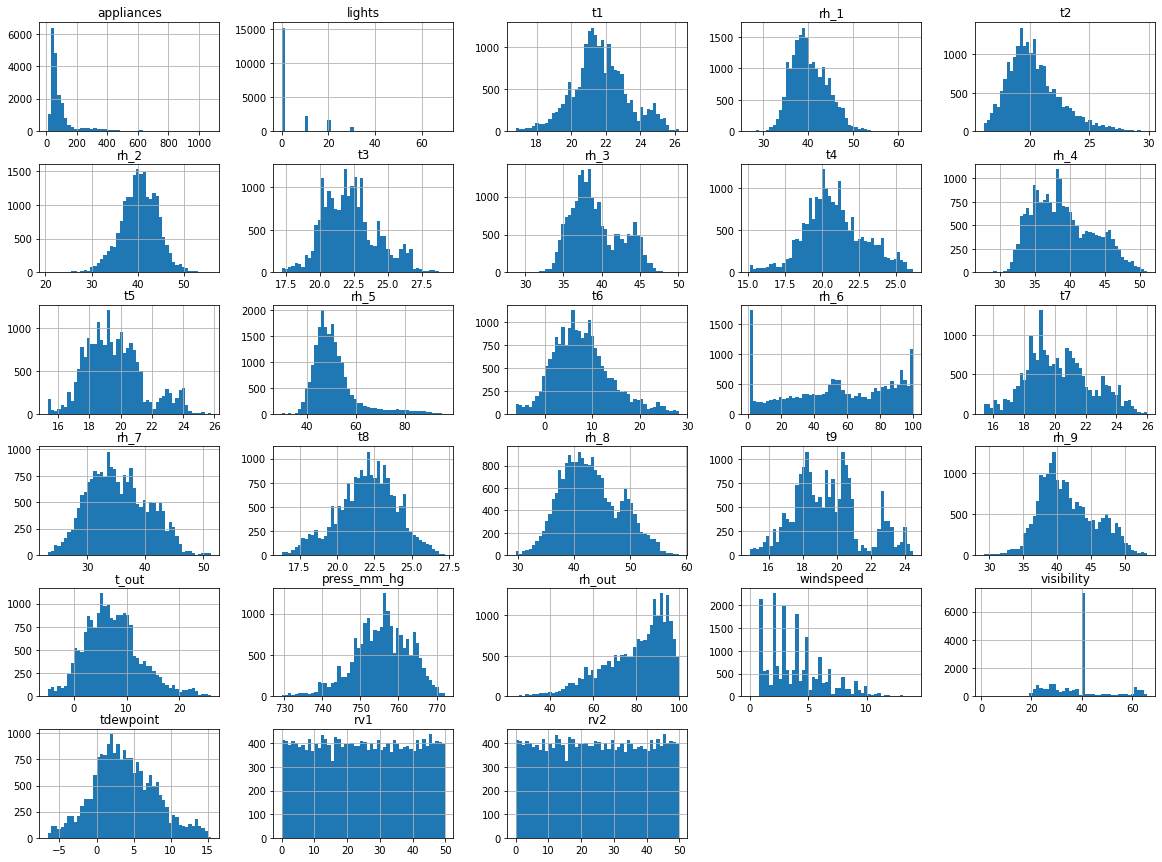

In [ ]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.savefig("Attribute Histogram Plots")
plt.show()

Here we could see the different correlations of the variables with each other so as you could see here in the diagonal its one its because its the correlation of the variable with itself of course that will always give us one so appliances with respect to lights we could see 0.198201. 

In [ ]:
df.corr()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
appliances,1.000000,0.198201,0.058996,0.087890,0.122590,-0.058680,0.088211,0.037644,0.043280,0.017365,...,0.041625,0.006519,0.021789,0.057210,0.148381,0.163705,0.060674,0.036430,-0.028430,-0.082900
lights,0.198201,1.000000,-0.022727,0.107266,-0.004990,0.051428,-0.096397,0.131253,-0.008049,0.115113,...,-0.023035,-0.028779,-0.023035,-0.005804,0.069807,0.068885,0.151187,0.143529,0.080350,0.053546
t1,0.058996,-0.022727,1.000000,0.163976,0.836827,-0.002565,0.892423,-0.028357,0.876984,0.098001,...,0.006217,0.024624,0.037569,0.040607,0.044352,0.061668,0.081955,0.089179,0.085175,0.069758
rh_1,0.087890,0.107266,0.163976,1.000000,0.269801,0.797675,0.253182,0.844803,0.105981,0.880435,...,-0.004865,-0.035140,-0.035998,-0.029701,0.015034,0.077313,0.038137,-0.003082,-0.019701,-0.021405
t2,0.122590,-0.004990,0.836827,0.269801,1.000000,-0.165586,0.735194,0.121740,0.761939,0.231678,...,0.083231,0.082408,0.081797,0.069496,0.060496,0.056358,0.058432,0.053618,0.039029,0.013577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19.0,0.163705,0.068885,0.061668,0.077313,0.056358,-0.019359,0.019794,-0.011083,0.015634,-0.006154,...,-0.043451,-0.043451,-0.043451,-0.043616,-0.043616,1.000000,-0.043451,-0.043451,-0.043451,-0.043451
20.0,0.060674,0.151187,0.081955,0.038137,0.058432,-0.002817,0.021814,0.010769,0.011194,0.014570,...,-0.043451,-0.043451,-0.043451,-0.043616,-0.043616,-0.043451,1.000000,-0.043451,-0.043451,-0.043451
21.0,0.036430,0.143529,0.089179,-0.003082,0.053618,-0.002587,0.016141,0.004262,0.031081,0.009530,...,-0.043451,-0.043451,-0.043451,-0.043616,-0.043616,-0.043451,-0.043451,1.000000,-0.043451,-0.043451
22.0,-0.028430,0.080350,0.085175,-0.019701,0.039029,0.001208,0.012839,0.002477,0.029893,-0.001073,...,-0.043451,-0.043451,-0.043451,-0.043616,-0.043616,-0.043451,-0.043451,-0.043451,1.000000,-0.043451


In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Heatmap of the  correlations
darkest green here means the number one which is positively correlated and darkest red here means that there is a perfect negative correlation 

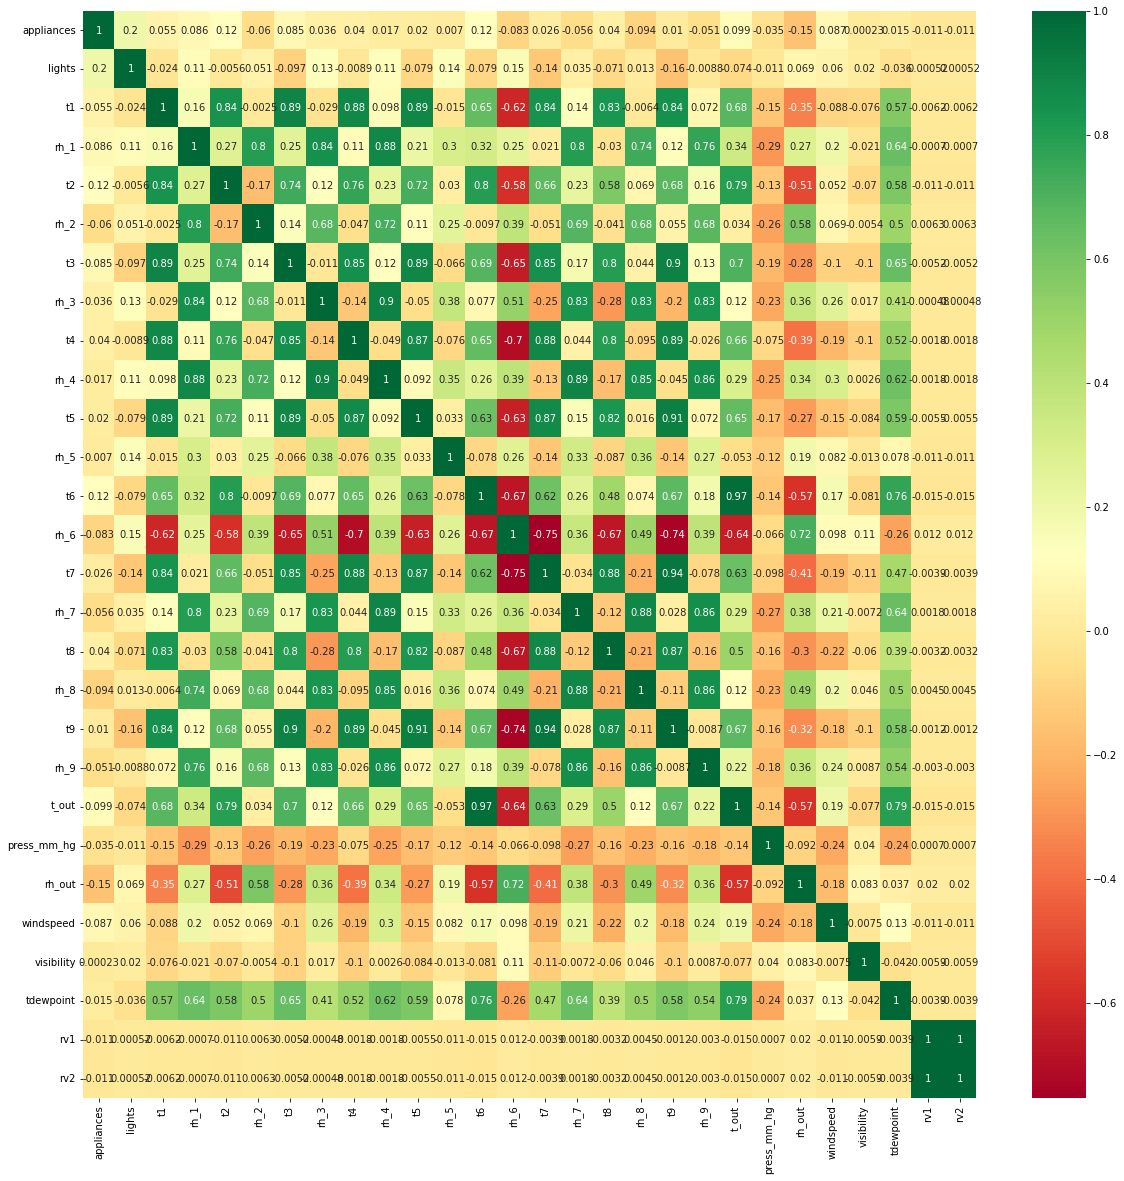

In [ ]:
corrmap = df.corr()
top_corr_features = corrmap.index
plt.figure(figsize=(20,20)) #size of the heatmap
df_heatmap = sns.heatmap(df[top_corr_features].corr(), annot=True,cmap="RdYlGn")

Sorting the value of energy consumption of appliances in descending order.The highest is 1080 W

In [ ]:
sorted_appliances=df.sort_values('appliances', ascending=False)
sorted_appliances.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-16 18:50:00,1080,30,21.930000,42.766667,21.040000,38.080000,20.700000,40.633333,20.89,39.733333,...,17.79,40.672500,2.083333,765.033333,85.500000,3.666667,40.000000,-0.083333,27.408521,27.408521
2016-01-21 18:50:00,1070,30,19.600000,34.300000,18.426667,33.963333,18.390000,36.930000,17.70,35.400000,...,16.00,36.930000,-0.616667,764.533333,82.833333,1.000000,64.166667,-3.216667,11.735734,11.735734
2016-01-14 17:00:00,910,0,21.463333,41.693333,20.856667,38.363333,21.666667,43.930000,18.70,42.660000,...,17.00,43.466667,4.600000,747.900000,76.000000,7.000000,40.000000,0.700000,18.937972,18.937972
2016-04-04 15:40:00,900,0,23.000000,43.166667,22.200000,40.426667,26.100000,38.930000,21.60,41.526667,...,20.70,43.333333,14.766667,749.266667,59.666667,7.000000,40.000000,7.000000,15.105153,15.105153
2016-01-21 19:00:00,890,20,19.730000,37.863333,18.566667,34.090000,18.390000,36.863333,17.60,35.133333,...,16.00,36.730000,-0.800000,764.500000,84.000000,1.000000,64.000000,-3.200000,3.221583,3.221583


Only 1% of values we are going to considered as outliers.How we are going to identify the 1% of value ,the code is given below.

In [ ]:
len(sorted_appliances.head(len(sorted_appliances)//1000))

19

So when we do the execution of the code it will give 19,means that 1% of the values out of 19000 plus values of the engery consumed is 19.

Here we are going to see What is the value of 19th place in our data,because the 19th place would be our baseline for us to be able to identify whether or not we are going to go for more than or less than but in this case we are going to go for more than because we are actually looking for higher value of certain boundary.

In [ ]:
sorted_appliances.appliances[19]

790

So here we have 790 as the base line of our value so that means to say that above 790 would be considered outliers.

To identify and present these outliers we are going to show them using boxplot for appliances

The number of the 0, 1% top values of appliances' load is 19 and they have power load higher than 790 wh.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


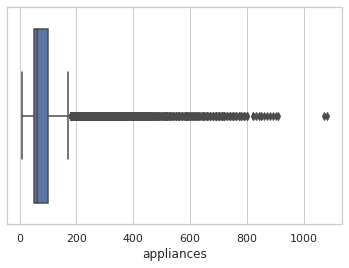

In [ ]:
sorted_appliances=df.sort_values('appliances',ascending=False)
print("The number of the 0, 1% top values of appliances' load is",len(sorted_appliances.head(len(sorted_appliances)//1000)),"and they have power load higher than",sorted_appliances.appliances[19],"wh.")
#boxplot appliances
sns.set(style="whitegrid")
ax= sns.boxplot(sorted_appliances.appliances)

Droping outliers having value greater than 790 and values less 0.

In [ ]:
df=df.dropna()
df=df.drop(df[(df.appliances>790)| (df.appliances<0)].index)

In [ ]:
import warnings
warnings.filterwarnings("ignore")


Indexing different elements.Created new feature for our dataset.

In [ ]:
df['hour']=df.index.hour
df['week']=df.index.week
df['weekday']=df.index.weekday
df['month']=df.index.month


In [ ]:
import numpy as np
df['log_appliances']=np.log(df.appliances)

Taking Averages of house temperature and house humidity.We have not consider t6 and rh6 because they are the values outside the building and here we are not going to consider the values outside the house so we only have 8 feature to consider

In [ ]:
df['house_temp']=(df.t1+df.t2+df.t3+df.t4+df.t5+df.t7+df.t8+df.t9)/8
df['house_hum']=(df.rh_1+df.rh_2+df.rh_3+df.rh_4+df.rh_5+df.rh_7+df.rh_8+df.rh_9)/8

In [ ]:
df['house_temp'].head()

date
2016-01-11 17:00:00    18.435000
2016-01-11 17:10:00    18.439167
2016-01-11 17:20:00    18.421667
2016-01-11 17:30:00    18.396250
2016-01-11 17:40:00    18.408750
Name: house_temp, dtype: float64

In [ ]:
df['house_hum'].head()

date
2016-01-11 17:00:00    46.742500
2016-01-11 17:10:00    46.672708
2016-01-11 17:20:00    46.562917
2016-01-11 17:30:00    46.468750
2016-01-11 17:40:00    46.462917
Name: house_hum, dtype: float64

Remove Additive assumptions .

In [ ]:
#Remove Additive assumptions
df['hour*lights']=df.hour*df.lights
df['t3rh3']=df.t3 * df.rh_3
df['t2rh2']=df.t3 * df.rh_2
df['t1rh1']=df.t3 * df.rh_1
df['t4rh4']=df.t3 * df.rh_4
df['t5rh5']=df.t3 * df.rh_5
df['t6rh6']=df.t3 * df.rh_6
df['t7rh7']=df.t3 * df.rh_7
df['t8rh8']=df.t3 * df.rh_8
df['t9rh9']=df.t3 * df.rh_9

Calculating avearge energy load per weekly and per hour

In [ ]:
def code_mean(data,cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [ ]:
df['weekday_avg']=list(map(
    code_mean(df[:], 'weekday', "appliances").get, df.weekday))
df['hour_avg']=list(map(
    code_mean(df[:], 'hour', "appliances").get, df.hour))

In [ ]:
df['weekday_avg'].head()

date
2016-01-11 17:00:00    110.896974
2016-01-11 17:10:00    110.896974
2016-01-11 17:20:00    110.896974
2016-01-11 17:30:00    110.896974
2016-01-11 17:40:00    110.896974
Name: weekday_avg, dtype: float64

In [ ]:
df['hour_avg'].head()

date
2016-01-11 17:00:00    158.812121
2016-01-11 17:10:00    158.812121
2016-01-11 17:20:00    158.812121
2016-01-11 17:30:00    158.812121
2016-01-11 17:40:00    158.812121
Name: hour_avg, dtype: float64

The intervals of our values is 10 mins so as you could see here we have 0, 10 ,20 ,so we are not going to use these kind of interval but instead we are going to use different interval the reason for this is that as much as possible what we are going to do is  that we are going to lesson the impact of the noise for that we are going to consider 30 min and 1 hr interval.

In [ ]:
df_hour=df.resample('1H').mean()
df_30min=df.resample('30min').mean()

In [ ]:
df_hour.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t2rh2,t1rh1,t4rh4,t5rh5,t6rh6,t7rh7,t8rh8,t9rh9,weekday_avg,hour_avg
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,55.000000,35.000000,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,...,883.158985,920.289972,905.169862,1090.758833,1667.505400,819.306000,963.981894,899.389533,110.896974,158.812121
2016-01-11 18:00:00,176.666667,51.666667,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,...,878.556278,907.034385,910.742800,1086.911222,1724.039456,831.280282,960.767228,895.383300,110.896974,187.426829
2016-01-11 19:00:00,173.333333,25.000000,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,...,923.769074,1059.017196,958.878059,1120.399064,1767.197556,902.610096,986.899474,908.593167,110.896974,141.256098
2016-01-11 20:00:00,125.000000,35.000000,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,...,922.396271,979.381176,995.069497,1496.497763,1757.252954,867.602463,1014.644028,912.025341,110.896974,126.982968
2016-01-11 21:00:00,103.333333,23.333333,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,...,916.011056,932.448650,976.262922,1406.305956,1754.744983,888.653483,1009.336578,912.881144,110.896974,96.496350


In [ ]:
df_30min.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t2rh2,t1rh1,t4rh4,t5rh5,t6rh6,t7rh7,t8rh8,t9rh9,weekday_avg,hour_avg
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,56.666667,30.000000,19.890000,46.863333,19.200000,44.713056,19.790000,44.817778,18.975556,45.816389,...,884.871369,927.425367,906.706336,1091.682367,1658.907744,822.076600,966.367689,901.038700,110.896974,158.812121
2016-01-11 17:30:00,53.333333,40.000000,19.890000,46.142222,19.200000,44.540000,19.790000,44.977778,18.890000,45.661111,...,881.446600,913.154578,903.633389,1089.835300,1676.103056,816.535400,961.596100,897.740367,110.896974,158.812121
2016-01-11 18:00:00,60.000000,46.666667,19.845556,45.641389,19.200000,44.477778,19.750000,44.863333,18.890000,45.814444,...,878.436556,901.419936,904.834789,1085.372444,1709.945200,815.015333,959.652500,894.477500,110.896974,187.426829
2016-01-11 18:30:00,293.333333,56.666667,19.950000,46.116667,19.337778,44.400000,19.790000,44.863333,18.926667,46.318889,...,878.676000,912.648833,916.650811,1088.450000,1738.133711,847.545231,961.881956,896.289100,110.896974,187.426829
2016-01-11 19:00:00,260.000000,33.333333,20.273333,52.206667,19.717778,45.111111,19.937778,45.973333,19.000000,47.427778,...,899.449815,1041.061059,945.665119,1101.596267,1760.907780,911.723081,973.114948,903.592333,110.896974,141.256098


Setting the assumptions as to lower or higher ,setting the relationship between consumption and load is very much significance to proceed so ofcourse when the consumption is high the load is higher to ,we are going to do lot of tryouts 
we are going to indentify which one is going to be our boundary or bases  so that we can be able to identify whether or not a certain value at the certain point of date can be considered higher or lower so this would depend on appliances consumption
 

In [ ]:


df_hour['low_consum']=(df_hour.appliances+25<(df_hour.hour_avg))*1
df_hour['high_consum']=(df_hour.appliances+25>(df_hour.hour_avg))*1

df_30min['low_consum']=(df_30min.appliances+25<(df_30min.hour_avg))*1
df_30min['high_consum']=(df_30min.appliances+35>(df_30min.hour_avg))*1

In [ ]:
def daily(x,df=df):
  return df.groupby('weekday')[x].mean()
def hourly(x,df=df):
  return df.groupby('hour')[x].mean()

def monthly_daily(x,df=df):
  by_day = df.pivot_table(index='weekday',
                          columns=['month'],
                          values=x,
                          aggfunc='mean')
  return round(by_day,ndigits=2)

plotting the hourly consumption

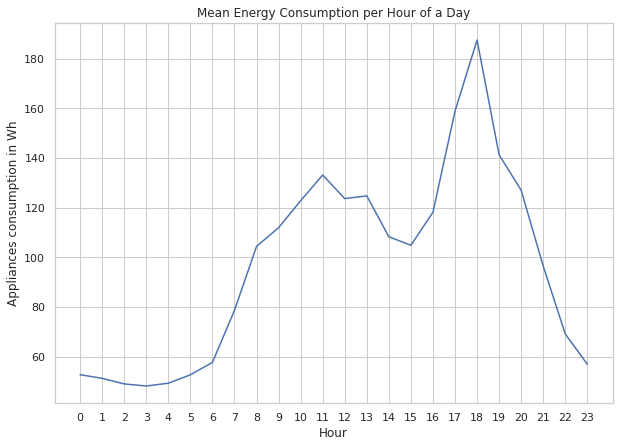

In [ ]:

import matplotlib.pyplot as plt
hourly('appliances').plot(figsize=(10,7))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks=list(range(0,24,1))
plt.title('Mean Energy Consumption per Hour of a Day')
plt.xticks(ticks);



Weekly Consumption

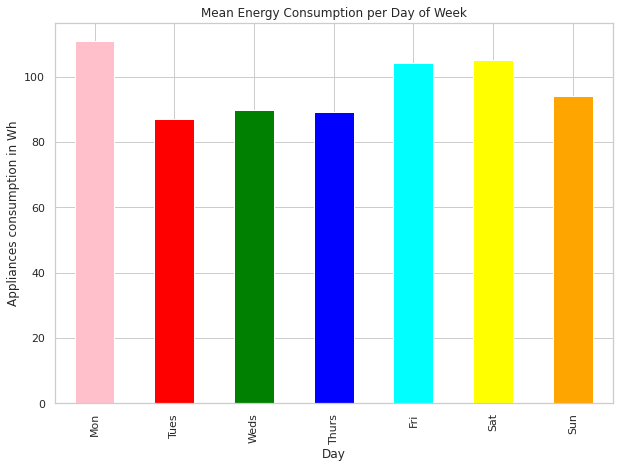

In [ ]:
#Weekly Consumption
daily('appliances').plot(kind='bar', color=['pink', 'red','green','blue','cyan','yellow','orange'],figsize=(10,7))
ticks=list(range(0,7,1))
labels="Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xlabel('Day')
plt.ylabel('Appliances consumption in Wh')
plt.title('Mean Energy Consumption per Day of Week')
plt.xticks(ticks,labels);

Monthly Consumption

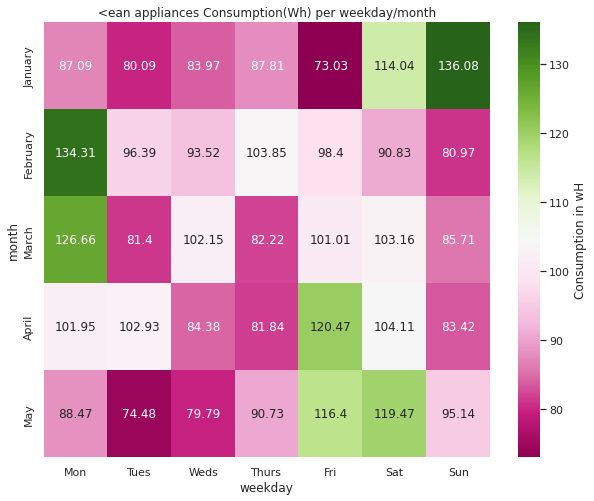

In [ ]:
#Monthly Consumption
sns.set(rc={'figure.figsize':(10,8)},)
ax=sns.heatmap(monthly_daily('appliances').T,cmap="PiYG",
               xticklabels="Mon Tues Weds Thurs Fri Sat Sun".split(),
               yticklabels="January February March April May".split(),
               annot=True, fmt='g',
               cbar_kws={'label': 'Consumption in wH'}).set_title("<ean appliances Consumption(Wh) per weekday/month")
plt.show()

Histogram for raw data and already log transform data

Text(0.5, 0, 'Appliance Lof(wH)')

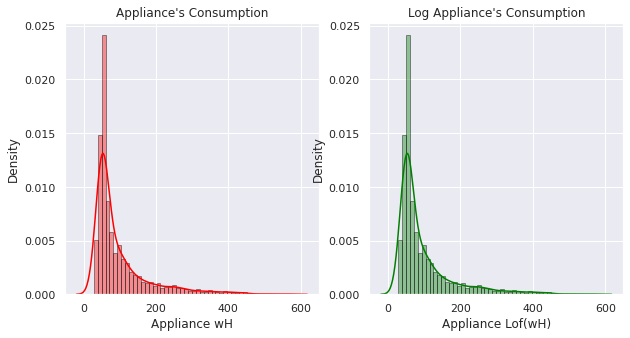

In [ ]:
f, axes= plt.subplots(1,2,figsize=(10,5))

sns.distplot(df_hour.appliances, hist=True, color='red', hist_kws={'edgecolor':'black'},ax=axes[0])
axes[0].set_title("Appliance's Consumption")
axes[0].set_xlabel('Appliance wH')

sns.distplot(df_hour.appliances, hist=True, color='green', hist_kws={'edgecolor':'black'},ax=axes[1])
axes[1].set_title("Log Appliance's Consumption")
axes[1].set_xlabel('Appliance Lof(wH)')


here we have pearsons correlation to identify linearlity among different pairs of features.Here we are going to find which one has stronger correlation with log appliances.

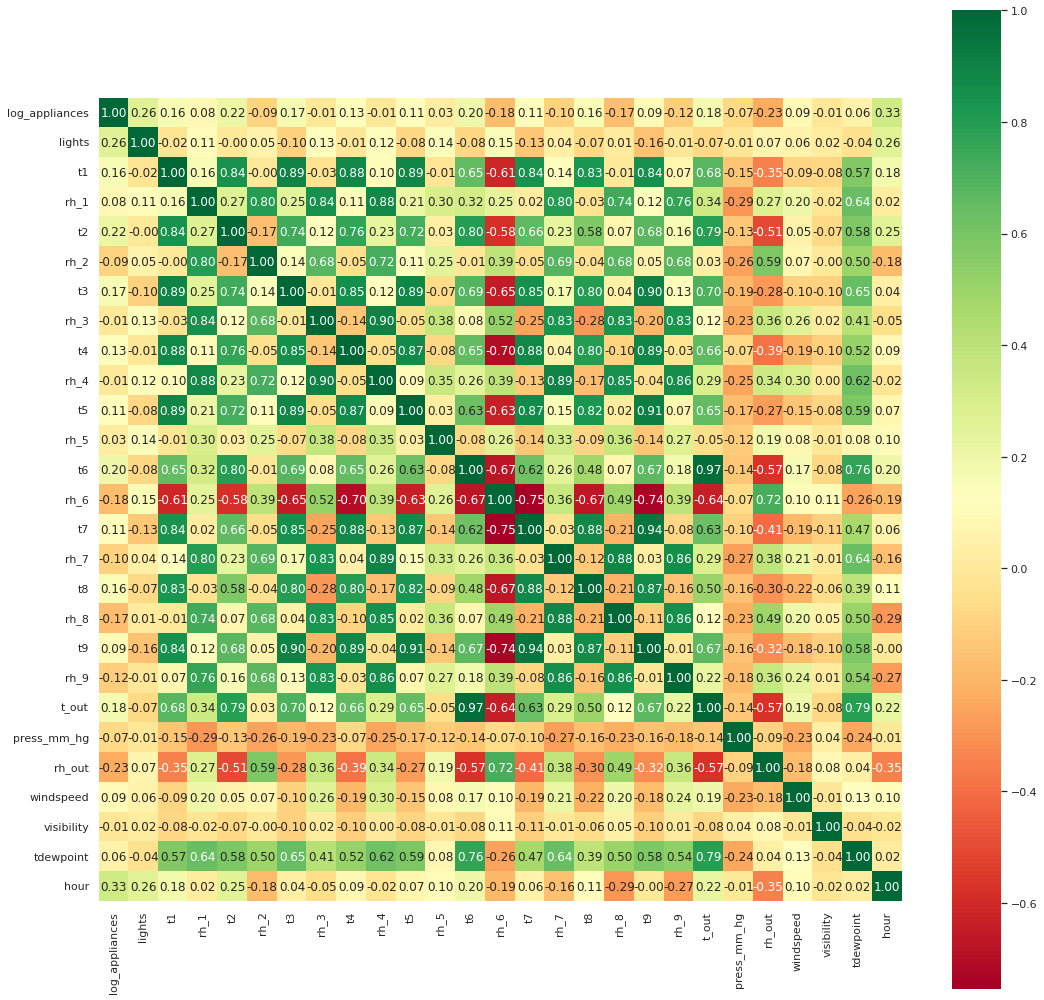

In [ ]:
col = ['log_appliances','lights','t1','rh_1','t2','rh_2','t3','rh_3','t4',
       'rh_4','t5','rh_5','t6','rh_6','t7','rh_7','t8','rh_8','t9',
       'rh_9','t_out','press_mm_hg','rh_out','windspeed','visibility',
       'tdewpoint','hour']
corr=df[col].corr()
plt.figure(figsize=(18,18))
sns.set(font_scale=1)
sns.heatmap(corr, cbar=True, annot=True, square=True, cmap='RdYlGn', fmt='.2f',xticklabels=col,yticklabels=col)
plt.show()





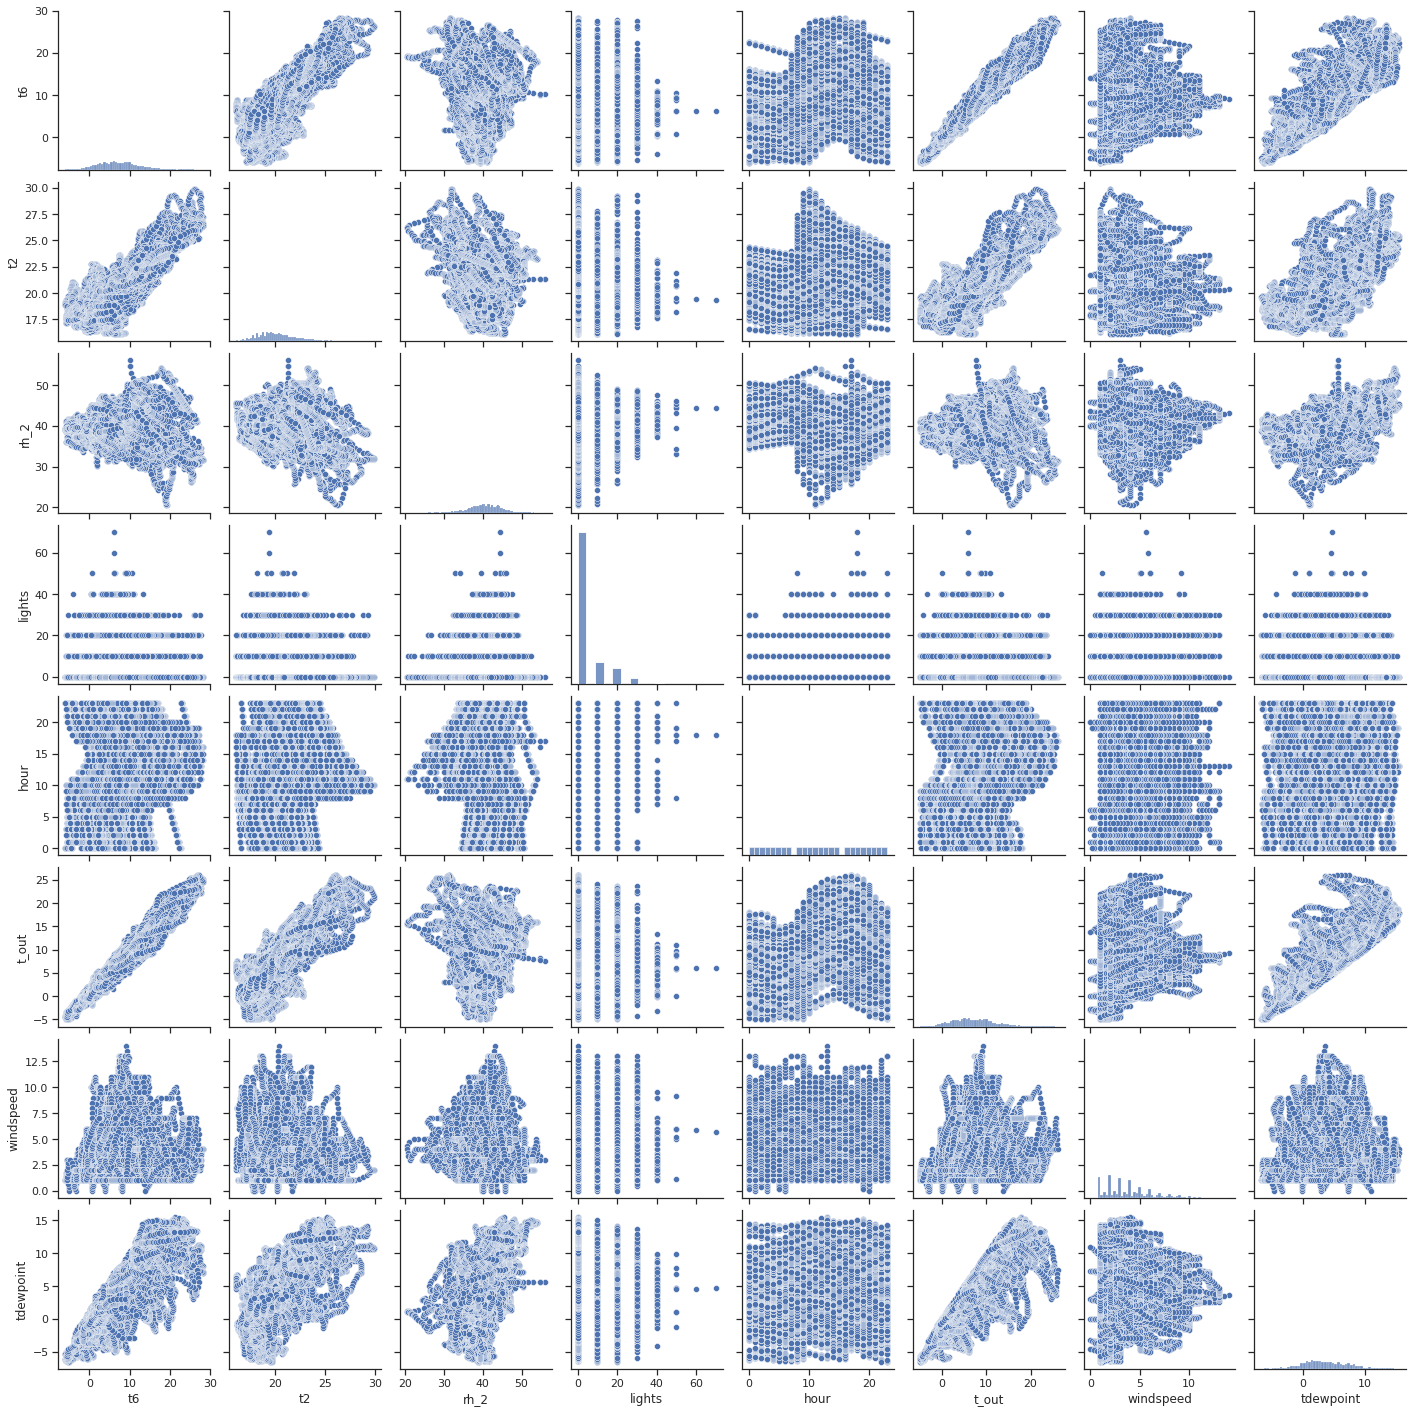

In [ ]:
col=['t6','t2','rh_2','lights','hour','t_out','windspeed','tdewpoint']
sns.set(style="ticks",color_codes=True)
sns.pairplot(df[col])
plt.show()

**Training the model**

In [ ]:
import pandas as pd
for cat_feature in ['weekday','hour']:
    df_hour=pd.concat([df_hour, pd.get_dummies(df_hour[cat_feature])], axis=1)
    df_30min=pd.concat([df_30min, pd.get_dummies(df_30min[cat_feature])], axis=1)
    df=pd.concat([df, pd.get_dummies(df_hour[cat_feature])], axis=1)

In [ ]:
lin_model=['low_consum','high_consum','hour','t6','rh_6','lights','hour*lights','windspeed','t6rh6']

In [ ]:
df_hour.lights= df_hour.lights.astype(float)
df_hour.log_appliances= df_hour.log_appliances.astype(float)
df_hour.hour= df_hour.hour.astype(float)
df_hour.low_consum= df_hour.low_consum.astype(float)
df_hour.high_consum= df_hour.high_consum.astype(float)
df_hour.t6rh6= df_hour.t6rh6.astype(float)

In [ ]:
test_size=.2
test_index= int(len(df_hour.dropna())*(1-test_size))

X1_train, X1_test = df_hour[lin_model].iloc[:test_index,], df_hour[lin_model].iloc[test_index:,]
y1_train = df_hour.log_appliances.iloc[:test_index,]
y_test = df_hour.log_appliances.iloc[test_index:,]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

In [ ]:
from sklearn import linear_model
lin_model = linear_model.LinearRegression()
lin_model.fit(X1_train, y1_train)

LinearRegression()

**Model Evaluation and Selection**

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
def evaluate(model, test_features, test_labels):
    prediction = model.predict(test_features)
    errors=abs(prediction - test_labels)
    mape= 100 * np.mean(errors/ test_labels)
    r_score = 100 * r2_score(test_labels, prediction)
    accuracy= 100 - mape
    print(model,'\n')
    print('Average Error: {:0.4f} degrees'.format(np.mean(errors)))
    print('Variance score R^2: {:0.2f}%'.format(r_score))
    print('Accuracy: {:0.2f}%\n'.format(accuracy))

In [ ]:
evaluate(lin_model, X1_test, y_test)

LinearRegression() 

Average Error: 0.3212 degrees
Variance score R^2: 25.35%
Accuracy: 92.62%



Validating our model

In [ ]:
cv = TimeSeriesSplit(n_splits = 10)
print('Linear Model:')
scores =  cross_val_score(lin_model,X1_train, y1_train, cv=cv, scoring='neg_mean_absolute_error')
print("Accuracy : 0%.2f (+/- %0.2f) degrees" % (100+scores.mean(),scores.std()*2))
scores = cross_val_score(lin_model, X1_train , y1_train, cv = cv ,scoring='r2')
print("R^2: %0.2f (+/- %0.2f) degrees " %(scores.mean(),scores.std()*2))

Linear Model:
Accuracy : 099.64 (+/- 0.07) degrees
R^2: 0.27 (+/- 0.19) degrees 


Results of predicted value

In [ ]:
y1_pred = lin_model.predict(X1_test)


Text(0.5, 0.01, 'Fitted values')

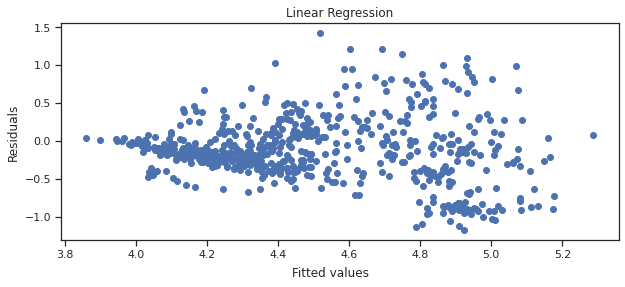

In [ ]:
fig, ax = plt.subplots(figsize=(10,4),sharey=True)
ax.scatter(y1_pred,y_test-y1_pred)
ax.set_title('Linear Regression')
fig.text(0.06, 0.5, 'Residuals', ha ='center' , va='center', rotation='vertical')
fig.text(0.5,0.01,'Fitted values',ha ='center' , va='center')

Text(0.5, 0.01, 'True values')

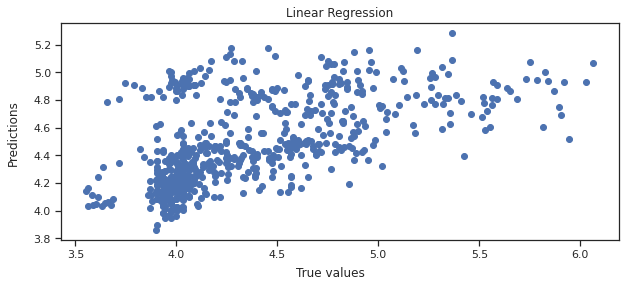

In [ ]:
fig, ax = plt.subplots(figsize=(10,4),sharey=True)
ax.scatter(y_test,y1_pred)
ax.set_title('Linear Regression')
fig.text(0.06, 0.5, 'Predictions', ha ='center' , va='center', rotation='vertical')
fig.text(0.5,0.01,'True values',ha ='center' , va='center')

Comparing predicted value and actual value to check whether our model is overfitting or underfitting.

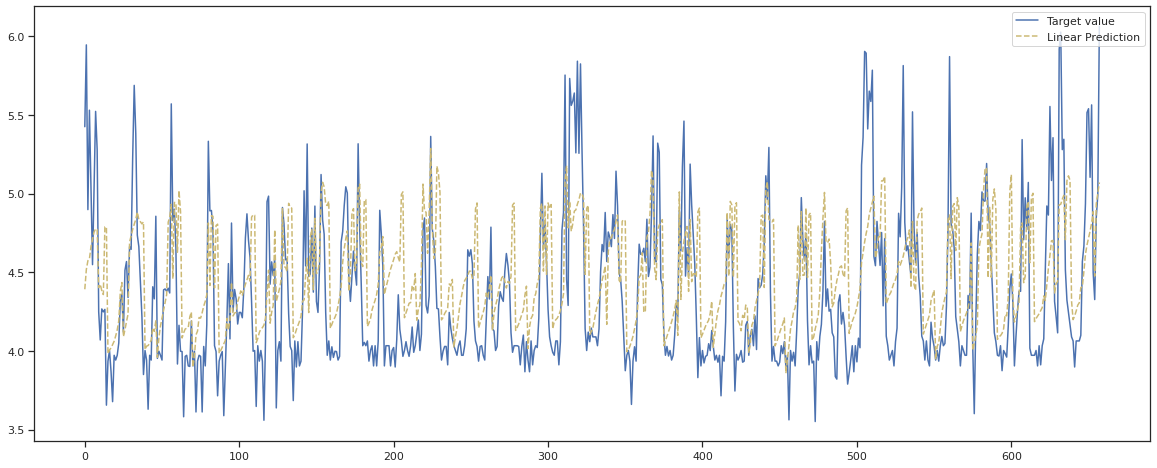

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.plot(y_test.values, label='Target value', color='b')
plt.plot(y1_pred, label='Linear Prediction', linestyle='--', color='y')
plt.legend(loc=1)